# Features Engineering

In this notebook I'll create typical technical analysis features for ML models to be trained in.


In [1]:
%pylab inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import ta

Populating the interactive namespace from numpy and matplotlib


[ta documentation](https://technical-analysis-library-in-python.readthedocs.io/en/latest/)

In [2]:
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.volatility import AverageTrueRange
from ta.momentum import UltimateOscillator
from ta.momentum import ROCIndicator
from ta.trend import IchimokuIndicator
from ta.trend import adx
from ta.trend import VortexIndicator

In [3]:
df = pd.read_csv('EURUSD_M5_r.csv', index_col=['date'], parse_dates=['date'], dayfirst=True)
columns_list = df.columns
df

,open,high,low,close,volume
date,,,,,
2021-04-23 04:55:00,1.20270,1.20271,1.20262,1.20266,82
2021-04-23 05:00:00,1.20266,1.20279,1.20265,1.20276,124
2021-04-23 05:05:00,1.20275,1.20279,1.20269,1.20271,69
2021-04-23 05:10:00,1.20272,1.20279,1.20271,1.20277,75
2021-04-23 05:15:00,1.20276,1.20287,1.20275,1.20286,115
...,...,...,...,...,...
2021-05-18 13:35:00,1.22144,1.22197,1.22134,1.22192,608
2021-05-18 13:40:00,1.22191,1.22191,1.22154,1.22157,659
2021-05-18 13:45:00,1.22156,1.22171,1.22130,1.22158,729


## Bollinger Bands

In [4]:
indicator_bb = BollingerBands(close=df["close"], window=20, window_dev=2, fillna=True)
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm
date,,,,,,,,
2021-04-23 04:55:00,1.20270,1.20271,1.20262,1.20266,82,1.202660,1.202660,1.202660
2021-04-23 05:00:00,1.20266,1.20279,1.20265,1.20276,124,1.202810,1.202610,1.202710
2021-04-23 05:05:00,1.20275,1.20279,1.20269,1.20271,69,1.202792,1.202628,1.202710
2021-04-23 05:10:00,1.20272,1.20279,1.20271,1.20277,75,1.202813,1.202637,1.202725
2021-04-23 05:15:00,1.20276,1.20287,1.20275,1.20286,115,1.202886,1.202618,1.202752
...,...,...,...,...,...,...,...,...
2021-05-18 13:35:00,1.22144,1.22197,1.22134,1.22192,608,1.222812,1.221143,1.221977
2021-05-18 13:40:00,1.22191,1.22191,1.22154,1.22157,659,1.222807,1.221102,1.221954
2021-05-18 13:45:00,1.22156,1.22171,1.22130,1.22158,729,1.222787,1.221063,1.221925


In [5]:
#df = dropna(df)
#df

## Volatility
Average True Range (ATR)

The indicator provide an indication of the degree of price volatility. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.

In [6]:
ATR_10 = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=10,fillna=True)
ATR_20 = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=20,fillna=True)
ATR_40 = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=40,fillna=True)
ATR_60 = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=160,fillna=True)
ATR_120 = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=120,fillna=True)

In [7]:
df['ATR_10'] = ATR_10.average_true_range()
df['ATR_20'] = ATR_20.average_true_range()
df['ATR_40'] = ATR_40.average_true_range()
df['ATR_60'] = ATR_60.average_true_range()
df['ATR_120'] = ATR_120.average_true_range()
df.head()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,ATR_20,ATR_40,ATR_60,ATR_120
date,,,,,,,,,,,,,
2021-04-23 04:55:00,1.20270,1.20271,1.20262,1.20266,82,1.202660,1.202660,1.202660,0.0,0.0,0.0,0.0,0.0
2021-04-23 05:00:00,1.20266,1.20279,1.20265,1.20276,124,1.202810,1.202610,1.202710,0.0,0.0,0.0,0.0,0.0
2021-04-23 05:05:00,1.20275,1.20279,1.20269,1.20271,69,1.202792,1.202628,1.202710,0.0,0.0,0.0,0.0,0.0
2021-04-23 05:10:00,1.20272,1.20279,1.20271,1.20277,75,1.202813,1.202637,1.202725,0.0,0.0,0.0,0.0,0.0
2021-04-23 05:15:00,1.20276,1.20287,1.20275,1.20286,115,1.202886,1.202618,1.202752,0.0,0.0,0.0,0.0,0.0


In [8]:
df.tail()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,ATR_20,ATR_40,ATR_60,ATR_120
date,,,,,,,,,,,,,
2021-05-18 13:35:00,1.22144,1.22197,1.22134,1.22192,608,1.222812,1.221143,1.221977,0.000460,0.000420,0.000384,0.000308,0.000317
2021-05-18 13:40:00,1.22191,1.22191,1.22154,1.22157,659,1.222807,1.221102,1.221954,0.000452,0.000418,0.000383,0.000308,0.000318
2021-05-18 13:45:00,1.22156,1.22171,1.22130,1.22158,729,1.222787,1.221063,1.221925,0.000447,0.000418,0.000384,0.000309,0.000319
2021-05-18 13:50:00,1.22160,1.22198,1.22147,1.22194,564,1.222768,1.221059,1.221913,0.000454,0.000423,0.000387,0.000310,0.000320
2021-05-18 13:55:00,1.22195,1.22197,1.22118,1.22118,600,1.222771,1.220961,1.221866,0.000487,0.000441,0.000397,0.000313,0.000324


## Momentum

In [9]:
#UltimateOscillator


The **Rate-of-Change (ROC)** indicator, which is also referred to as simply Momentum, is a pure momentum oscillator that measures the percent change in price from one period to the next. The ROC calculation compares the current price with the price “n” periods ago. 

In [10]:
ROCI_10 = ta.momentum.ROCIndicator(df['close'], window=10, fillna=True)
ROCI_20 = ta.momentum.ROCIndicator(df['close'], window=20, fillna=True)
ROCI_40 = ta.momentum.ROCIndicator(df['close'], window=40, fillna=True)
ROCI_60 = ta.momentum.ROCIndicator(df['close'], window=60, fillna=True)
ROCI_120 = ta.momentum.ROCIndicator(df['close'], window=120, fillna=True)

In [11]:
df["ROCI_10"] = ROCI_10.roc()
df["ROCI_20"] = ROCI_20.roc()
df["ROCI_40"] = ROCI_40.roc()
df["ROCI_60"] = ROCI_60.roc()
df["ROCI_120"] = ROCI_120.roc()

# Trend

In [12]:
ADX_5 = adx(high=df['high'],low=df['low'], close=df['close'], window=5, fillna=True)
ADX_10 = adx(high=df.high, low=df.low, close=df.close, window=10, fillna=True)
ADX_20 = adx(high=df.high, low=df.low, close=df.close, window=20, fillna=True)
ADX_40 = adx(high=df.high, low=df.low, close=df.close, window=45, fillna=True)

D:\apps\anaconda\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
D:\apps\anaconda\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])
D:\apps\anaconda\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
D:\apps\anaconda\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])
D:\apps\anaconda\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
D:\apps\anaconda\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])
D:\apps\anaconda\lib\site-packages\ta\trend.py

In [13]:
VI = VortexIndicator(high=df['high'],low=df['low'], close=df['close'], window=30, fillna=True)

In [14]:
df['Vortex_diff'] = VI.vortex_indicator_diff()
df['Vortex_neg'] = VI.vortex_indicator_neg()
df['Vortex_pos'] = VI. vortex_indicator_pos()

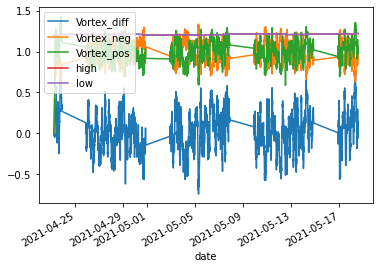

In [15]:
df["Vortex_diff"].plot()
df["Vortex_neg"].plot()
df["Vortex_pos"].plot()
#df["ichimoku_cl"].plot()
df['high'].plot()
df['low'].plot()
plt.legend(loc='upper left')
pylab.show()

In [16]:
Ichimoku = IchimokuIndicator(high=df['high'],low=df['low'],window1=9,window2=26,window3=52,fillna=True)

In [17]:

df["ichimoku_a"] = Ichimoku.ichimoku_a()
df['ichimoku_b'] = Ichimoku.ichimoku_b()
df['ichimoku_bl'] = Ichimoku.ichimoku_base_line()
df['ichimoku_cl'] = Ichimoku.ichimoku_conversion_line()


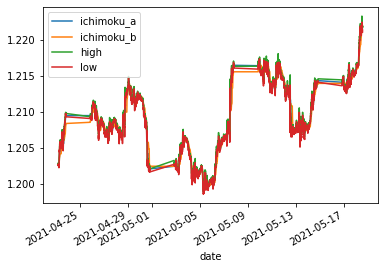

In [18]:

df["ichimoku_a"].plot()
df["ichimoku_b"].plot()
#df["ichimoku_bl"].plot()
#df["ichimoku_cl"].plot()
df['high'].plot()
df['low'].plot()
plt.legend(loc='upper left')
pylab.show()


## Column for classification

In [19]:
close_price = df["close"].values.tolist()
close_Y = [0]
for i in range(1, len(close_price)):
    if close_price[i] > close_price[i - 1]:
        close_Y.append(1)
    else:       
        close_Y.append(0)

df['close_change'] = close_Y

## Summary

In [20]:
df.tail()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,ATR_20,...,ROCI_60,ROCI_120,Vortex_diff,Vortex_neg,Vortex_pos,ichimoku_a,ichimoku_b,ichimoku_bl,ichimoku_cl,close_change
date,,,,,,,,,,,,,,,,,,,,,
2021-05-18 13:35:00,1.22144,1.22197,1.22134,1.22192,608,1.222812,1.221143,1.221977,0.000460,0.000420,...,0.037660,0.425728,0.115481,0.929707,1.045188,1.221960,1.22202,1.222075,1.221845,1
2021-05-18 13:40:00,1.22191,1.22191,1.22154,1.22157,659,1.222807,1.221102,1.221954,0.000452,0.000418,...,-0.017188,0.387887,0.139303,0.922886,1.062189,1.221955,1.22202,1.222195,1.221715,0
2021-05-18 13:45:00,1.22156,1.22171,1.22130,1.22158,729,1.222787,1.221063,1.221925,0.000447,0.000418,...,-0.013914,0.406036,0.108927,0.936118,1.045045,1.221932,1.22202,1.222260,1.221605,1
2021-05-18 13:50:00,1.22160,1.22198,1.22147,1.22194,564,1.222768,1.221059,1.221913,0.000454,0.000423,...,0.002455,0.424070,0.145484,0.912070,1.057554,1.221907,1.22202,1.222260,1.221555,1
2021-05-18 13:55:00,1.22195,1.22197,1.22118,1.22118,600,1.222771,1.220961,1.221866,0.000487,0.000441,...,-0.053199,0.364085,0.116512,0.921296,1.037809,1.221907,1.22202,1.222260,1.221555,0


In [21]:
df.describe()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,ATR_20,...,ROCI_60,ROCI_120,Vortex_diff,Vortex_neg,Vortex_pos,ichimoku_a,ichimoku_b,ichimoku_bl,ichimoku_cl,close_change
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.209225,1.209388,1.209064,1.209228,356.763600,1.209925,1.208458,1.209192,0.000325,0.000324,...,0.017239,0.029600,0.015287,0.983103,0.998390,1.209182,1.209108,1.209162,1.209202,0.485400
std,0.005046,0.005053,0.005039,0.005048,345.210928,0.005068,0.005006,0.005006,0.000168,0.000145,...,0.158984,0.239926,0.245088,0.135389,0.136146,0.005000,0.004922,0.004985,0.005027,0.499837
min,1.198690,1.198860,1.198590,1.198690,1.000000,1.199435,1.198231,1.199039,0.000000,0.000000,...,-0.583746,-0.751811,-0.743197,0.000000,0.000000,1.199232,1.199720,1.199205,1.199030,0.000000
25%,1.206070,1.206208,1.205920,1.206070,143.000000,1.206602,1.205273,1.206088,0.000199,0.000210,...,-0.073018,-0.107057,-0.158016,0.902394,0.913677,1.206053,1.205920,1.206010,1.206070,0.000000
50%,1.208605,1.208750,1.208430,1.208600,278.000000,1.209157,1.207778,1.208504,0.000297,0.000309,...,0.011634,0.017335,0.012022,0.988203,1.000000,1.208475,1.208315,1.208445,1.208553,0.000000
75%,1.213490,1.213650,1.213340,1.213483,466.000000,1.214175,1.212729,1.213391,0.000412,0.000399,...,0.099351,0.151658,0.184109,1.075321,1.090802,1.213429,1.213437,1.213435,1.213429,1.000000
max,1.222860,1.223390,1.222550,1.222870,6565.000000,1.223001,1.221314,1.221987,0.001485,0.001133,...,0.819325,0.949522,0.780261,1.335034,1.433892,1.222338,1.222020,1.222260,1.222655,1.000000


Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений.

In [22]:
df.count()

open            5000
high            5000
low             5000
close           5000
volume          5000
bb_bbh          5000
bb_bbl          5000
bb_bbm          5000
ATR_10          5000
ATR_20          5000
ATR_40          5000
ATR_60          5000
ATR_120         5000
ROCI_10         5000
ROCI_20         5000
ROCI_40         5000
ROCI_60         5000
ROCI_120        5000
Vortex_diff     5000
Vortex_neg      5000
Vortex_pos      5000
ichimoku_a      5000
ichimoku_b      5000
ichimoku_bl     5000
ichimoku_cl     5000
close_change    5000
dtype: int64

In [23]:
#df.fillna(0,inplace = True) #заполняем пропуски

## Plots

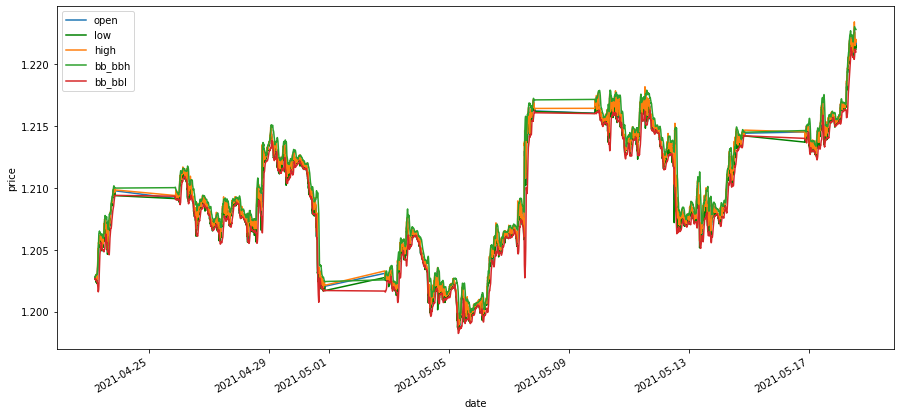

In [24]:
plt.figure(figsize(15,7))
df.open.plot()
df.low.plot(color='g')
df.high.plot()
df.bb_bbh.plot()
df.bb_bbl.plot()
plt.ylabel('price')
plt.legend(loc='upper left')
pylab.show()

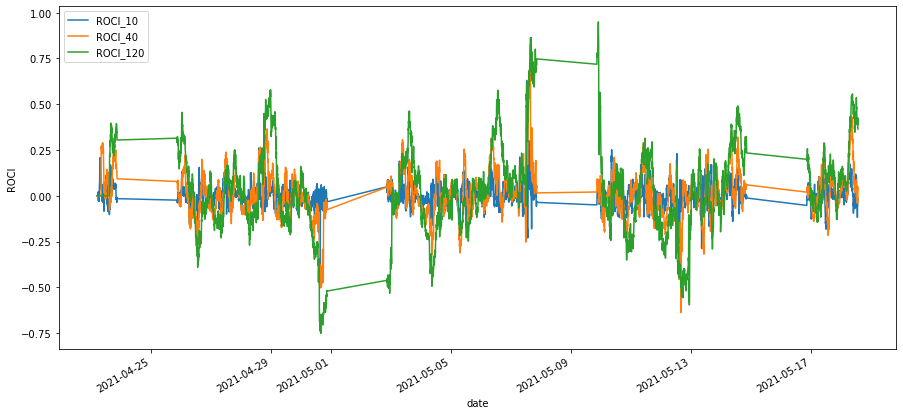

In [25]:
plt.figure(figsize(15,7))
df.ROCI_10.plot()
#df.ROCI_20.plot()
df.ROCI_40.plot()
df.ROCI_120.plot()
plt.ylabel('ROCI')
plt.legend(loc='upper left')
pylab.show()

Text(0, 0.5, 'ATR')

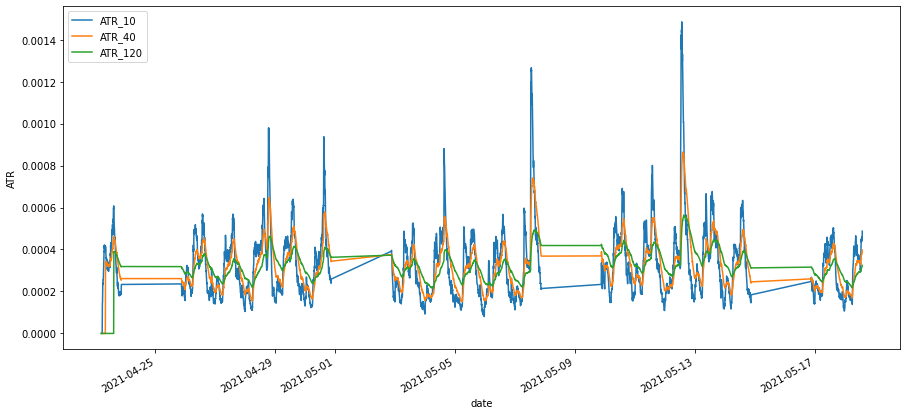

In [26]:
df.ATR_10.plot()
df.ATR_40.plot()
df.ATR_120.plot()
plt.legend(loc='upper left')
plt.ylabel('ATR')

## Saving the data

In [27]:
df.to_csv('data_ML_5_min.csv')